In [25]:
import numpy as np
import pandas as pd
import sys
import os

sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'funcs'))
import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":]
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Questions 1-4

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


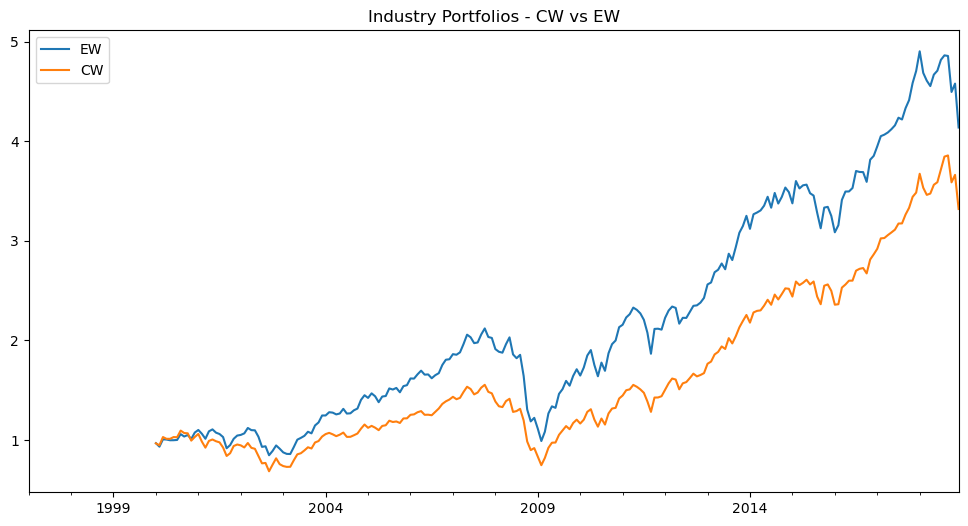

In [26]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

## Questions 5-6

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990


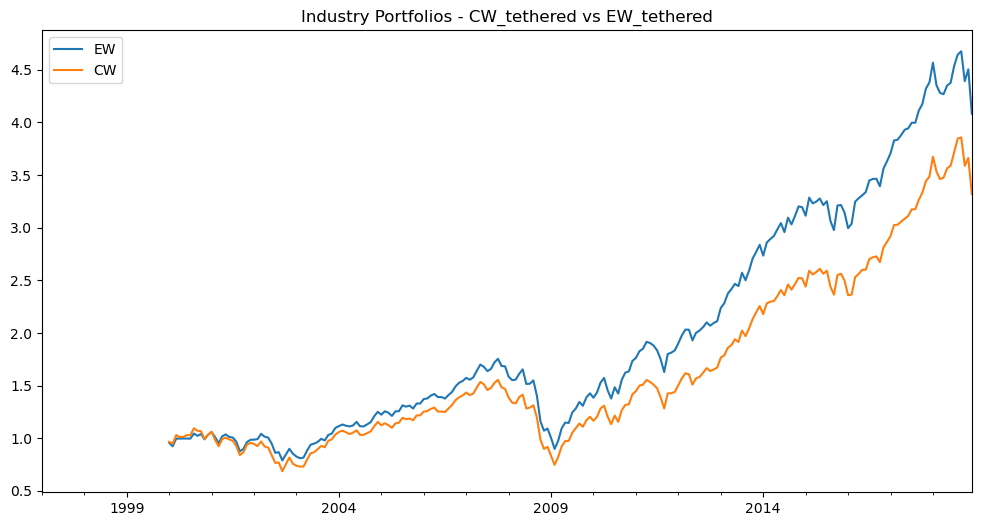

In [27]:
ewr_tethered = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)
cwr_tethered = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)
btr = pd.DataFrame({"EW": ewr_tethered, "CW": cwr_tethered})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW_tethered vs EW_tethered")
erk.summary_stats(btr.dropna())

## Question 7

In [30]:
erk.tracking_error(ewr, cwr)

0.18752094143646486

## Question 8

In [31]:
erk.tracking_error(ewr_tethered, cwr_tethered)

0.11671015519949166

## Questions 9-10

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.066306,0.11741,-0.741085,4.469206,0.055456,0.080583,0.300816,-0.421289


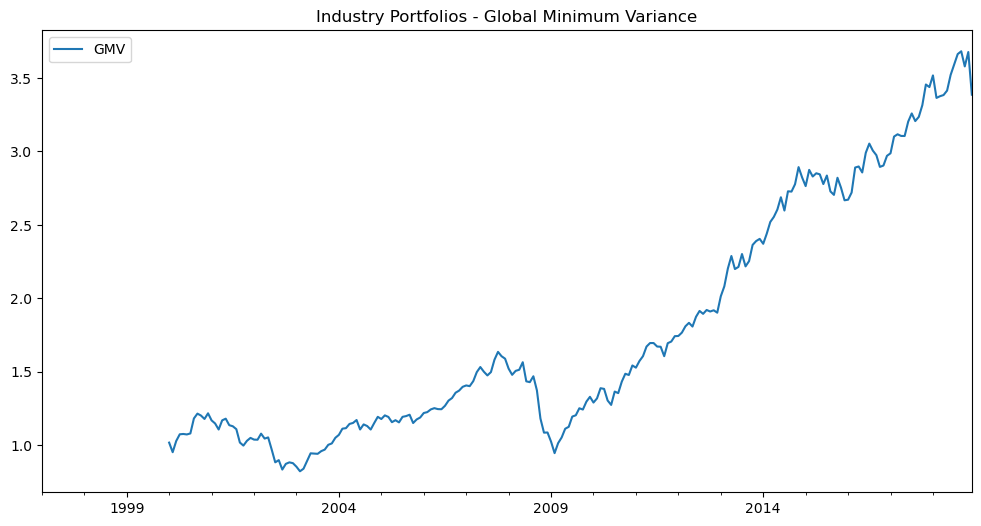

In [29]:
gmv = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
btr = pd.DataFrame({"GMV": gmv})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - Global Minimum Variance")
erk.summary_stats(btr.dropna())

## Questions 10-11

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.068468,0.114572,-0.731297,4.264942,0.053884,0.077715,0.326646,-0.39341


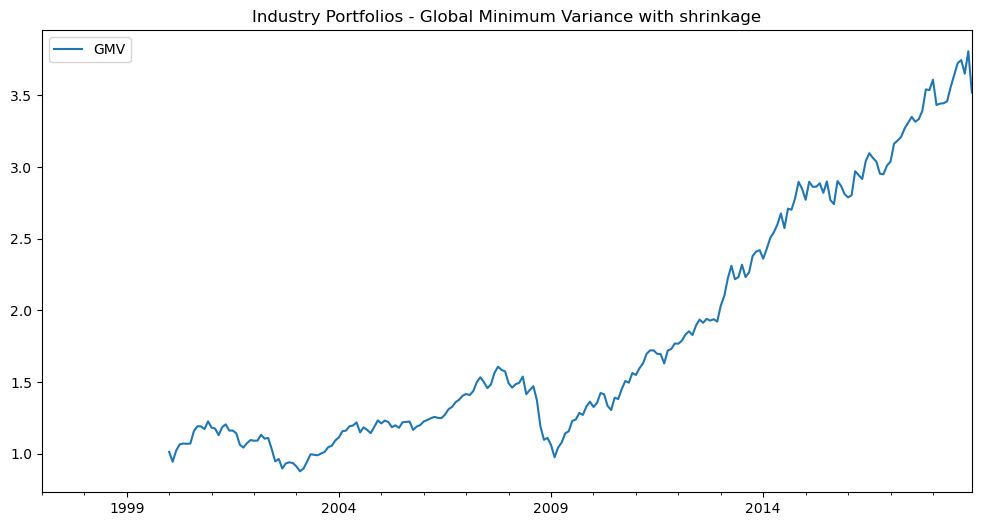

In [32]:
gmv_shrink = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"GMV": gmv_shrink})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - Global Minimum Variance with shrinkage")
erk.summary_stats(btr.dropna())